In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load dataset & Convert to DataFrame
california = fetch_california_housing()

df = pd.DataFrame(california.data
                  , columns=california.feature_names)
df['MedHouseValue'] = california.target  # Target variable


# Check for missing values
df.isnull().sum()

MedInc           0
HouseAge         0
AveRooms         0
AveBedrms        0
Population       0
AveOccup         0
Latitude         0
Longitude        0
MedHouseValue    0
dtype: int64

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MedInc         20640 non-null  float64
 1   HouseAge       20640 non-null  float64
 2   AveRooms       20640 non-null  float64
 3   AveBedrms      20640 non-null  float64
 4   Population     20640 non-null  float64
 5   AveOccup       20640 non-null  float64
 6   Latitude       20640 non-null  float64
 7   Longitude      20640 non-null  float64
 8   MedHouseValue  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [4]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


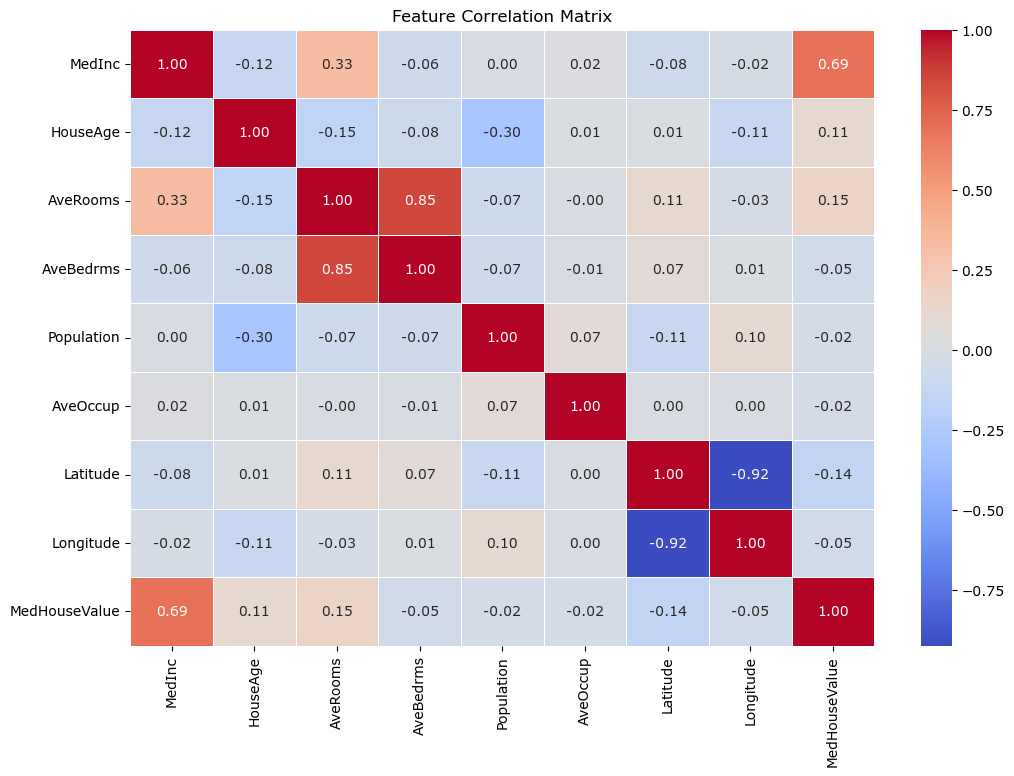

In [5]:
# Correlation matrix
plt.figure(figsize=(12, 8))

sns.heatmap(df.corr()
            , annot=True
            , cmap="coolwarm"
            , fmt=".2f"
            , linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

In [6]:
# Features
X = df.drop(columns=['MedHouseValue'])  

# Target
y = df['MedHouseValue']                 

X_train, X_test, y_train, y_test =\
train_test_split(X, y, test_size=0.2
                 , random_state=42)


In [7]:
# Standardize the data before ML!

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

# Predictions
y_pred_lin = lin_reg.predict(X_test_scaled)

# Metrics
print("Linear Regression:")
print(f"R² Score:\
{r2_score(y_test, y_pred_lin):.4f}")
print(f"MSE:\
{mean_squared_error(y_test, y_pred_lin):.4f}")

Linear Regression:
R² Score:0.5758
MSE:0.5559


In [9]:
# Polynomial Regression

poly_features =\
PolynomialFeatures(degree=2, include_bias=False)

X_poly_train =\
poly_features.fit_transform(X_train_scaled)
X_poly_test =\
poly_features.transform(X_test_scaled)

poly_reg = LinearRegression()
poly_reg.fit(X_poly_train, y_train)

# Predictions
y_pred_poly = poly_reg.predict(X_poly_test)

# Metrics
print("Polynomial Regression (Degree 2):")
print(f"R² Score:\
{r2_score(y_test, y_pred_poly):.4f}")
print(f"MSE:\
{mean_squared_error(y_test, y_pred_poly):.4f}")


Polynomial Regression (Degree 2):
R² Score:0.6457
MSE:0.4643


In [10]:
# Ridge Regression

ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train_scaled, y_train)

# Predictions
y_pred_ridge = ridge_reg.predict(X_test_scaled)

# Metrics
print("Ridge Regression:")
print(f"R² Score:\
{r2_score(y_test, y_pred_ridge):.4f}")
print(f"MSE:\
{mean_squared_error(y_test, y_pred_ridge):.4f}")

Ridge Regression:
R² Score:0.5758
MSE:0.5559


In [11]:
# Lasso Regression

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train_scaled, y_train)

# Predictions
y_pred_lasso = lasso_reg.predict(X_test_scaled)

# Metrics
print("Lasso Regression:")
print(f"R² Score:\
{r2_score(y_test, y_pred_lasso):.4f}")
print(f"MSE:\
{mean_squared_error(y_test, y_pred_lasso):.4f}")


Lasso Regression:
R² Score:0.4814
MSE:0.6796


In [12]:
# Elastic-Net Regression

elastic_net = ElasticNet(alpha=0.1
                         , l1_ratio=0.5)

elastic_net.fit(X_train_scaled, y_train)

# Predictions
y_pred_elastic =\
elastic_net.predict(X_test_scaled)

# Metrics
print("Elastic Net Regression:")
print(f"R² Score:\
{r2_score(y_test, y_pred_elastic):.4f}")
print(f"MSE:\
{mean_squared_error(y_test, y_pred_elastic):.4f}")

Elastic Net Regression:
R² Score:0.5148
MSE:0.6359


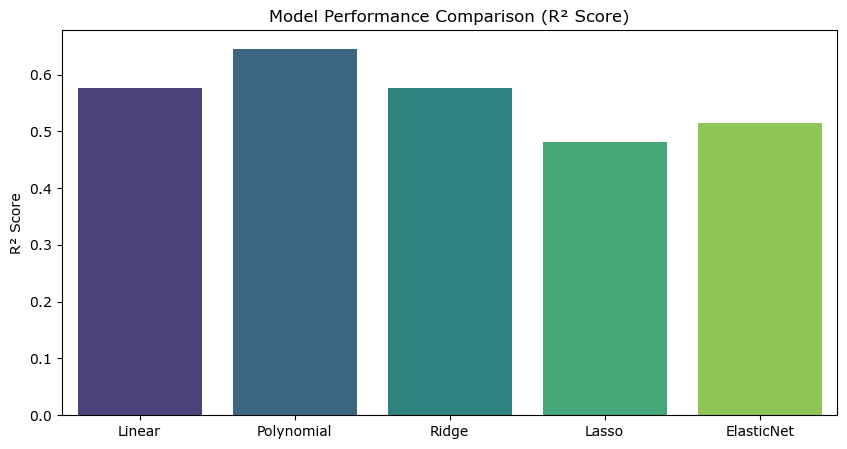

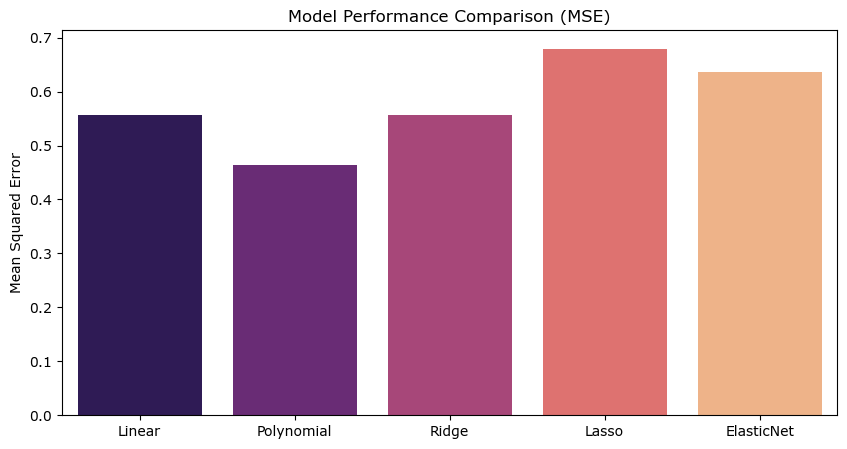

In [13]:
# Compare Model Performance:

models = ["Linear", "Polynomial", "Ridge", "Lasso", "ElasticNet"] 
r2_scores = [r2_score(y_test, y_pred_lin)
             , r2_score(y_test, y_pred_poly)
             , r2_score(y_test, y_pred_ridge)
             , r2_score(y_test, y_pred_lasso)
             , r2_score(y_test, y_pred_elastic)]

mse_scores = [mean_squared_error(y_test, y_pred_lin)
              , mean_squared_error(y_test, y_pred_poly)
              , mean_squared_error(y_test, y_pred_ridge)
              , mean_squared_error(y_test, y_pred_lasso)
              , mean_squared_error(y_test, y_pred_elastic)]

# Plot R² Scores
plt.figure(figsize=(10, 5))

sns.barplot(x=models
            , y=r2_scores
            , palette="viridis")

plt.ylabel("R² Score")
plt.title("Model Performance Comparison (R² Score)")
plt.show()

# Plot MSE Scores
plt.figure(figsize=(10, 5))

sns.barplot(x=models
            , y=mse_scores
            , palette="magma")

plt.ylabel("Mean Squared Error")
plt.title("Model Performance Comparison (MSE)")
plt.show()


### **Summary of Results**

- **Linear Regression** provides a good baseline.
- **Polynomial Regression** captures non-linearity but might overfit.
- **Ridge Regression** and **Lasso Regression** help in reducing overfitting.
- **Elastic Net** balances feature selection and regularization.
